<a href="https://colab.research.google.com/github/iamjasonlevin/oura-ring-unit-1/blob/main/Unit1OuraRing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this analysis, we'll be looking at my sleep data from 05-23-21 to 07-18-21 collected by my Oura Ring.


In [60]:
import pandas as pd 

oura_url = "https://raw.githubusercontent.com/iamjasonlevin/oura-ring-unit-1/main/oura_2021-05-23_2021-07-18_trends.csv"
oura = pd.read_csv(oura_url)
oura.head()

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2021-05-23,82,80,98,62,88,77,78,100,31740,27720,4020,8220,15570,3930,16,87,420,15720,NaN,2021-05-22T22:37:08-04:00,2021-05-23T07:26:08-04:00,64.38,55,22,-0.47,13.625,92,56,100,95,100,100,100,686,2966,500,8469,11597,692,455,196,97,0,0,1.56250,0,75,75,None,0,0,86,89,None,54
1,2021-05-24,66,67,76,1,79,79,83,70,29400,24360,5040,5700,18600,60,24,83,540,14610,NaN,2021-05-23T23:55:16-04:00,2021-05-24T08:05:16-04:00,64.80,54,17,-0.18,13.750,90,74,100,78,100,98,100,288,2513,500,6482,4969,561,539,192,19,0,129,1.31250,0,75,58,None,85,0,98,94,None,58
2,2021-05-25,84,94,100,26,96,81,83,84,34560,31380,3180,13530,16140,1710,25,91,510,17400,NaN,2021-05-24T22:40:13-04:00,2021-05-25T08:16:13-04:00,62.50,54,22,-0.11,14.250,89,96,100,60,100,98,100,581,2812,700,8265,10044,372,597,195,82,0,194,1.46875,0,93,90,92,94,95,100,91,None,100
3,2021-05-26,80,92,100,26,88,78,48,99,32340,28800,3540,10590,17250,960,23,89,2010,16710,NaN,2021-05-25T21:56:37-04:00,2021-05-26T06:55:37-04:00,69.12,58,21,-0.11,14.375,85,69,100,60,100,98,100,439,2721,500,9302,7348,608,552,222,54,0,4,1.43750,0,77,82,83,93,78,100,83,None,14
4,2021-05-27,83,100,100,1,97,71,91,90,37020,34200,2820,12150,22050,0,21,92,690,18540,NaN,2021-05-26T22:10:26-04:00,2021-05-27T08:27:26-04:00,67.66,58,20,0.05,14.750,87,84,100,60,100,98,100,526,2751,500,6292,9232,474,608,213,50,1,94,1.43750,0,82,87,90,88,82,100,64,None,76


In [61]:
# Divide REM, Deep, Total Sleep, and Total Bedtime by 3600 (60 sec * 60 min) to get # of hours
# After dividing, turn 4 equations below to comments to avoid accidental division

oura['REM_Sleep_Time'] = oura['REM Sleep Time']/3600
oura['Deep_Sleep_Time'] = oura['Deep Sleep Time']/3600 
oura['Total_Sleep_Time'] = oura['Total Sleep Time']/3600
oura["Total_Bedtime"] = oura["Total Bedtime"]/3600

In [62]:
# Inspect the data

oura.describe()

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,Recovery Index Score,REM_Sleep_Time,Deep_Sleep_Time,Total_Sleep_Time,Total_Bedtime
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,0.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,79.789474,86.017544,97.578947,30.543860,93.824561,81.228070,76.614035,77.245614,32461.052632,29383.684211,3077.368421,9772.105263,17666.842105,1944.736842,22.754386,90.438596,693.684211,16290.526316,NaN,64.717018,56.228070,22.140351,-0.052105,13.971491,69.666667,76.315789,96.245614,27.508772,55.070175,77.456140,99.122807,424.736842,2666.807018,592.105263,8446.771930,7457.578947,534.894737,563.578947,245.719298,36.000000,0.122807,50.754386,1.399123,0.491228,84.754386,83.175439,89.947368,84.052632,97.315789,87.491228,71.684211,2.714474,0.540205,8.162135,9.016959
std,5.618009,10.769486,5.716353,25.057128,6.525015,5.434735,13.003783,19.797439,3143.452199,3112.191827,1129.817505,2146.831333,2742.198126,1587.421658,3.460392,3.500090,610.595820,1654.654065,NaN,2.961449,2.154874,3.970600,0.163737,0.576714,11.900380,10.330534,8.253313,20.789010,43.714520,22.475439,3.311615,137.659586,157.640577,90.034455,2825.581388,2512.485536,87.829113,77.801246,67.257967,28.654967,0.381266,74.786907,0.086799,0.734915,5.751648,12.083227,13.295301,17.526940,4.547990,13.305642,23.797627,0.596342,0.440950,0.864498,0.873181
min,66.000000,62.000000,74.000000,1.000000,65.000000,66.000000,11.000000,30.000000,25680.000000,23010.000000,1200.000000,5520.000000,12000.000000,0.000000,16.000000,77.000000,150.000000,12720.000000,NaN,59.430000,51.000000,15.000000,-0.620000,13.000000,48.000000,54.000000,60.000000,1.000000,1.000000,37.000000,80.000000,160.000000,2356.000000,500.000000,3141.000000,2672.000000,348.000000,317.000000,121.000000,1.000000,0.000000,0.000000,1.218750,0.000000,74.000000,56.000000,0.000000,0.000000,81.000000,58.000000,14.000000,1.533333,0.000000,6.391667,7.133333
25%,76.000000,80.000000,98.000000,10.000000,90.000000,78.000000,70.000000,66.000000,30300.000000,27630.000000,2280.000000,8220.000000,16140.000000,660.000000,21.000000,89.000000,330.000000,15180.000000,NaN,62.270000,55.000000,19.000000,-0.150000,13.625000,57.000000,70.000000,95.000000,25.000000,1.000000,55.000000,100.000000,332.000000,2562.000000,500.000000,6850.000000,5741.000000,471.000000,506.000000,200.000000,14.000000,0.000000,0.000000,1.343750,0.000000,80.000000,74.000000,88.000000,81.000000,97.000000,73.000000,58.000000,2.283333,0.183333,7.675000,8.416667
50%,82.000000,89.000000,100.000000,26.000000,96.000000,81.000000,78.000000,81.000000,32700.000000,29700.000000,2880.000000,10050.000000,17790.000000,1710.000000,23.000000,91.000000,480.000000,16380.000000,NaN,64.710000,56.0000

In [63]:
# Calculate mean times for Deep Sleep, REM Sleep, and Total Sleep

print("The mean deep sleep time is " + str(oura['Deep_Sleep_Time'].mean()) + " hours.")
print("The mean REM sleep time is " + str(oura["REM_Sleep_Time"].mean()) + " hours.") 
print("The mean Total sleep time is " + str(oura["Total_Sleep_Time"].mean()) + " hours.")


The mean deep sleep time is 0.540204678362573 hours.
The mean REM sleep time is 2.7144736842105264 hours.
The mean Total sleep time is 8.162134502923976 hours.


# One Sample T Test

Use a reference value to compare Jason's total sleep time to population of American college students.

From a [survey](https://www.npr.org/sections/ed/2016/05/02/475581810/how-college-students-are-sleeping-or-not) of 30,000+ American college students, the overall average sleep time was 7.34 hours per night.


# Null Hypothesis: 
$H_0: \mu =$ 7.35

$H_a: \mu \neq$ 7.35

In [67]:
from scipy import stats as st
import pandas as pd
import numpy as np

stat, pval = st.stats.ttest_1samp(oura['Total_Sleep_Time'], 7.35)
print("The p-value is: " + str(pval))

The p-value is: 2.433702293765911e-09


# The p-value is below .05 confidence interval therefore we can reject the null hypothesis that the mean sleep time in all college students is 7.35 hours.
# Let's move on to other data.


Text(0.5, 1.0, 'Daily Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021')

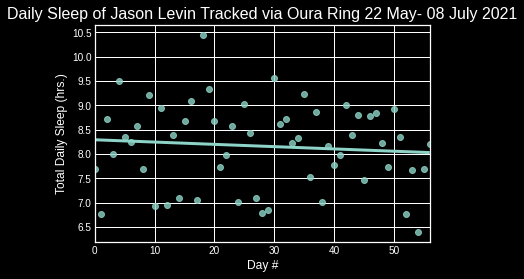

In [68]:
# Plot total sleep over timespan of roughly 55 days 

fig, ax = plt.subplots()
plt.style.use('dark_background')
sns.regplot(x= oura.index, y = oura['Total_Sleep_Time'], data = oura, ci= None);
ax.set_xlabel(xlabel = 'Day #') 
ax.set_ylabel(ylabel = 'Total Daily Sleep (hrs.)') 
ax.set_title('Daily Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021', color = 'white') 


In [72]:
# Find equation of line plotting total sleep over timespan
from statsmodels.formula.api import ols
import scipy.stats as st

model_day = ols("Total_Sleep_Time ~ oura.index", data = oura).fit()
print(model_day.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Sleep_Time   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4507
Date:                Sun, 25 Jul 2021   Prob (F-statistic):              0.505
Time:                        14:59:19   Log-Likelihood:                -71.843
No. Observations:                  57   AIC:                             147.7
Df Residuals:                      55   BIC:                             151.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2936      0.227     36.512      0.0

# $\hat{y}$ = -.047x + 8.2936
# Predicted Sleep = -.047(day #) + 8.2936
# Uh oh.  Why am I getting less sleep over time?  😵
# Let's check out my REM sleep and Deep Sleep..

Text(0.5, 1.0, 'Daily REM Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021')

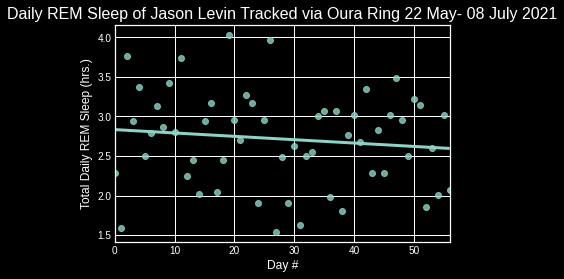

In [77]:
fig, ax = plt.subplots()
plt.style.use('dark_background')
sns.regplot(x= oura.index, y = oura['REM_Sleep_Time'], data = oura, ci= None);
ax.set_xlabel(xlabel = 'Day #') 
ax.set_ylabel(ylabel = 'Total Daily REM Sleep (hrs.)') 
ax.set_title('Daily REM Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021', color = 'white')

Text(0.5, 1.0, 'Daily Deep Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021')

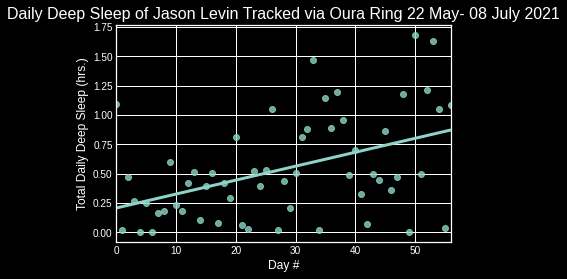

In [78]:
fig, ax = plt.subplots()
plt.style.use('dark_background')
sns.regplot(x= oura.index, y = oura['Deep_Sleep_Time'], data = oura, ci= None);
ax.set_xlabel(xlabel = 'Day #') 
ax.set_ylabel(ylabel = 'Total Daily Deep Sleep (hrs.)') 
ax.set_title('Daily Deep Sleep of Jason Levin Tracked via Oura Ring 22 May- 08 July 2021', color = 'white')

# So I'm getting less REM sleep over time, but more deep sleep.  Weird.
# Maybe falling off my exercise reigmen has something to do with it?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'REM Sleep Time (hrs.)'),
 Text(0.5, 0, 'Daily Burn (cal.)'),
 Text(0.5, 1.0, 'Burned Calories v. REM Sleep Time')]

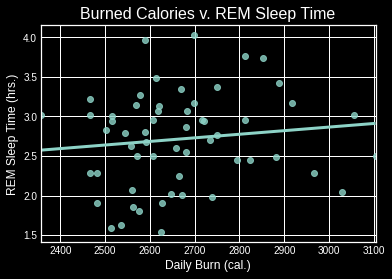

In [75]:
import seaborn as sns

# Plot REM Sleep v Burned Calories

sns.regplot(oura["Total Burn"], oura["REM_Sleep_Time"], ci= None).set(xlabel = "Daily Burn (cal.)", ylabel = "REM Sleep Time (hrs.)", title = "Burned Calories v. REM Sleep Time")

# Repeat for Total Sleep and Deep Sleep


In [ ]:
# Finding if there is significant relationship between Total Burn and REM, Deep, Total Sleep

from statsmodels.formula.api import ols
import scipy.stats as st

# Convert Total Burn to Total_Burn for ols model to work
oura["Total_Burn"] = oura["Total Burn"]
model = ols('REM_Sleep_Time ~ Total_Burn', data = oura).fit()
print(model.summary())

# Repeat for Total Sleep and Deep Sleep

                            OLS Regression Results                            
Dep. Variable:         REM_Sleep_Time   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8015
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.375
Time:                        17:25:39   Log-Likelihood:                -50.497
No. Observations:                  57   AIC:                             105.0
Df Residuals:                      55   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5054      1.353      1.113      0.2

# The high p-value suggests that we'd fail to reject the null hypothesis that there is a statistically significant relationship between total calories burnt and REM/deep sleep times.

# Let's check out avg. resting heart rate and sleep times.  I've heard a low one is good for your sleep.

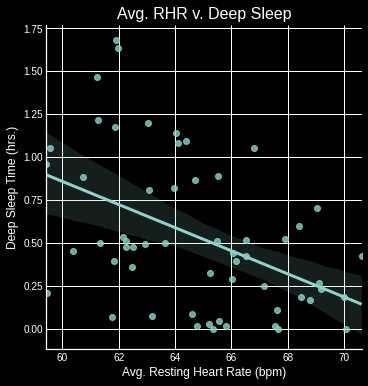

In [84]:
import pandas as pd 
import seaborn as sns 

# Plotting Avg Resting Heart Rate versus Deep Sleep Time
plt.style.use('dark_background')
sns.lmplot(x = "Average Resting Heart Rate", y = "Deep_Sleep_Time", data = oura).set(xlabel="Avg. Resting Heart Rate (bpm)", ylabel = "Deep Sleep Time (hrs.)", title = "Avg. RHR v. Deep Sleep ")

# Repeat for Total and REM.

In [58]:
import numpy as np
from statsmodels.formula.api import ols

# Convert Avg Resting Heart rate because ols will not work without "_"
oura["Average_Resting_Heart_Rate"] = oura["Average Resting Heart Rate"]

# Find p-value, r-squared, etc. for Avg. Resting Heart Rate and Deep Sleep Time
model = ols('Deep_Sleep_Time ~ Average_Resting_Heart_Rate', data = oura).fit()
print(model.summary())

# Repeat above for REM_Sleep_Time and Total_Sleep_Time to test relationships with Avg Resting Heart Rate

                            OLS Regression Results                            
Dep. Variable:        Deep_Sleep_Time   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           0.000411
Time:                        14:47:11   Log-Likelihood:                -27.177
No. Observations:                  57   AIC:                             58.35
Df Residuals:                      55   BIC:                             62.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# We can reject the null hypothesis that there is no statistically significant relationship between deep sleep and avg resting heart rate.